# Project Name - AirBnb Booking Analysis

##### Project Type    - EDA
##### Contribution    - Individual
##### Team Member 1 - Shubham Wankar

# Project Summary

# Github Link 

# Problem Statement

### Business Objective

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data

In [2]:
data = pd.read_csv('Airbnb NYC 2019.csv')

In [3]:
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
data.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

## Data Cleaning

## Checking Null Values

In [6]:
# Function to check missing value percentage
def get_percentage_null(data):
    null_perc = data.isnull().sum() / data.shape[0]
    null_perc = 100 * null_perc
    null_perc = pd.DataFrame(null_perc, 
                             columns=['Null Percentage'])
    null_perc['Null Percentage'] = \
                    null_perc['Null Percentage'].\
                            apply(lambda x: round(x, 2))
    return null_perc                                 

In [7]:
get_percentage_null(data)

Null Percentage
id                                         0.00
name                                       0.03
host_id                                    0.00
host_name                                  0.04
neighbourhood_group                        0.00
neighbourhood                              0.00
latitude                                   0.00
longitude                                  0.00
room_type                                  0.00
price                                      0.00
minimum_nights                             0.00
number_of_reviews                          0.00
last_review                               20.56
reviews_per_month                         20.56
calculated_host_listings_count             0.00
availability_365                           0.00

In [61]:
# # Replacing missing value with the median value
# last_review_median = data['last_review'].astype('datetime64[ns]').quantile(0.5, interpolation='midpoint')
# last_review_median = str(last_review_median).split(" ")[0]
# data['last_review'] = data['last_review'].fillna(last_review_median)
# reviews_per_month_median = data['reviews_per_month'].median()
# data['reviews_per_month'] = data['reviews_per_month'].fillna(reviews_per_month_median)
# # Dropping null values which are less than 1%
# data = data.dropna(axis=0)

## Uni-variate Analysis

#### Top 10 Property Owners

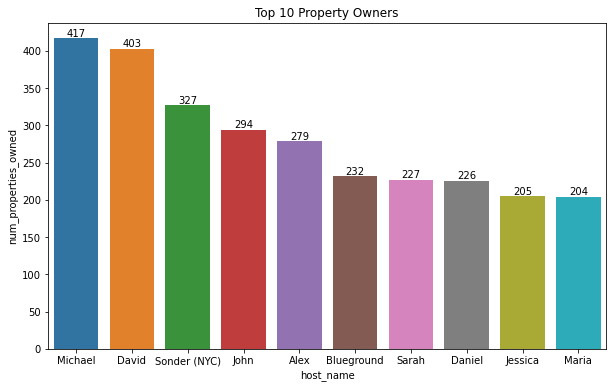

In [9]:
num_properties_owned_by_host = data.groupby('host_name')['name'].count()
top_10_property_owners = num_properties_owned_by_host.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
bar = sns.barplot(x=top_10_property_owners.index, 
                  y=top_10_property_owners)
plt.bar_label(bar.containers[0])
plt.title('Top 10 Property Owners')
plt.ylabel('num_properties_owned')
plt.show()

#### Inference
- This chart was specifically chosen because its concise and easily interpretable.
- By looking at this chart, we can get an insight on who are the top 10 property owners i.e., owners with the largest number of properties listed on AirBnb.
- This can be used by the business to reach out to the top owners with special offers or concessions that'll help retain them and grow their business.

#### Total Number of Properties by Neighbourhood Group

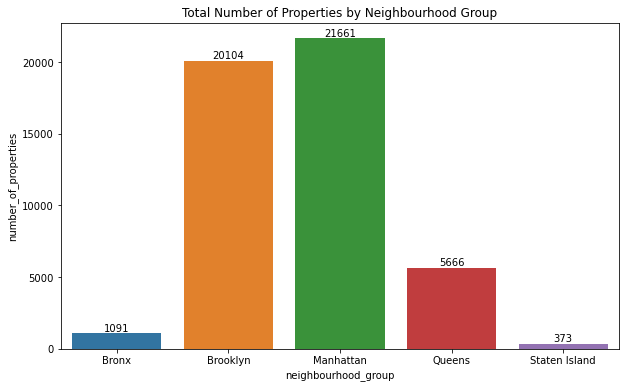

In [202]:
total_num_properties = data.groupby('neighbourhood_group').count().iloc[:,0]
plt.figure(figsize=(10, 6))
bar = sns.barplot(x=total_num_properties.index,
                 y=total_num_properties)
plt.bar_label(bar.containers[0])
plt.ylabel('number_of_properties')
plt.title('Total Number of Properties by Neighbourhood Group')
plt.show()

#### Inference
- The bar chart is used as it gives us a clear distribution of properties between the neighbourhood groups
- From the above plot, we can infer that Manhattan and Brooklyn have a very high number of properties listed on AirBnb when compared to the other neighbourhood groups.
- This information can be utilized by the business to invest into the growing areas such as Manhattan and Brooklyn. It also gives the business an opportunity to reach out to the under performing areas and help the local property owners get listed on AirBnb.

#### Total Number of Properties based on Room Type

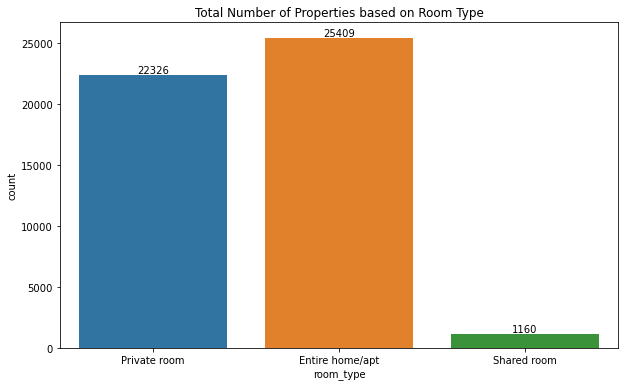

In [237]:
plt.figure(figsize=(10, 6))
bar = sns.countplot(data=data, x='room_type')
plt.bar_label(bar.containers[0])
plt.title('Total Number of Properties based on Room Type')
plt.show()

#### Inference
- The bar plot is used because it clearly displays the distribution of the of the room type
- From the above plot, we can infer that most of the properties on AirBnb are either entire homes / apartments or Private rooms. Very few shared rooms are available on AirBnb.
- This information can be utlized by the business by checking the trend of propeties based on room type and targeting selective audience based on their preferences.

#### Frequency Distribution of 365 Availability of Properties

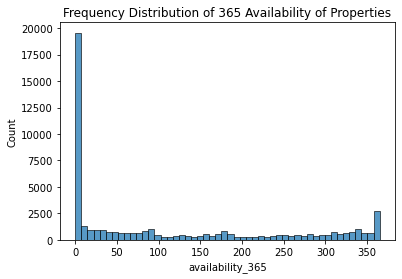

In [195]:
sns.histplot(data['availability_365'], bins=50)
plt.title('Frequency Distribution of 365 Availability of Properties')
plt.show()

#### Minimum Nights Frequency

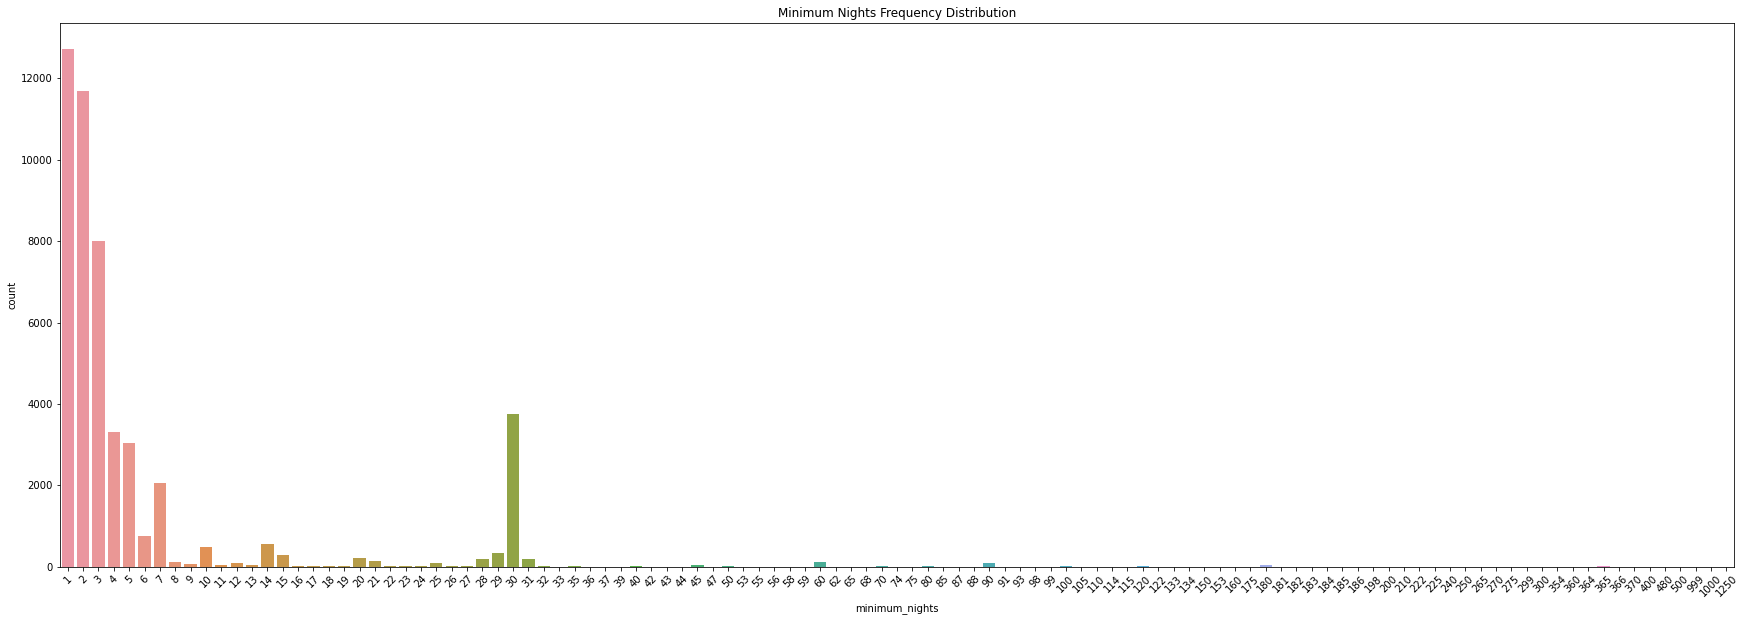

In [238]:
plt.figure(figsize=(30, 10))
sns.countplot(x=data['minimum_nights'])
plt.title('Minimum Nights Frequency Distribution')
plt.xticks(rotation=45)
plt.show()

#### Last Review Frequency

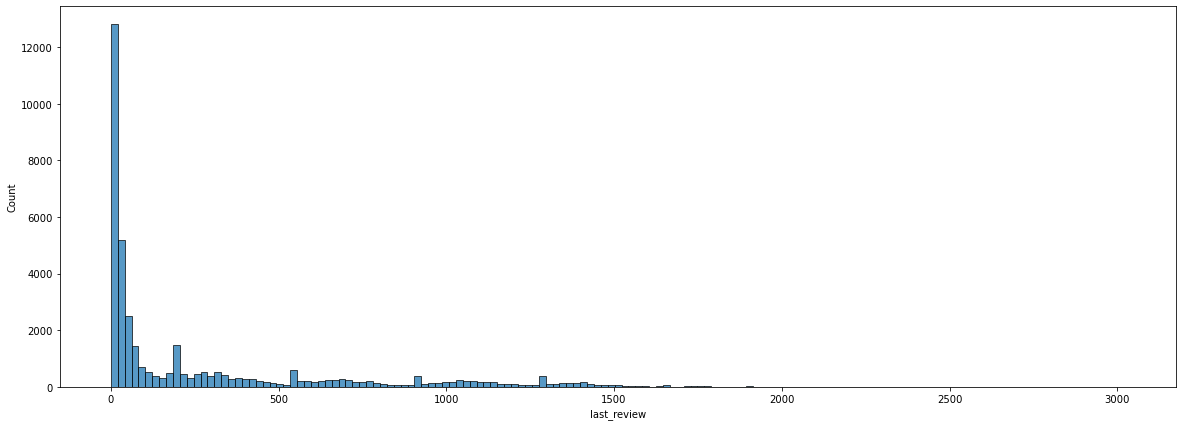

In [196]:
max_date = data['last_review'].astype('datetime64[ns]').max()
days_since_last_reviewed = data['last_review'].astype('datetime64[ns]').apply(lambda x: max_date - x).dt.days
plt.figure(figsize=(20, 7))
sns.histplot(x=days_since_last_reviewed)
plt.title('Last Review Frequency')
plt.show()

## Bi-Variate Analysis

#### Price distribution across Neighbourhood Group

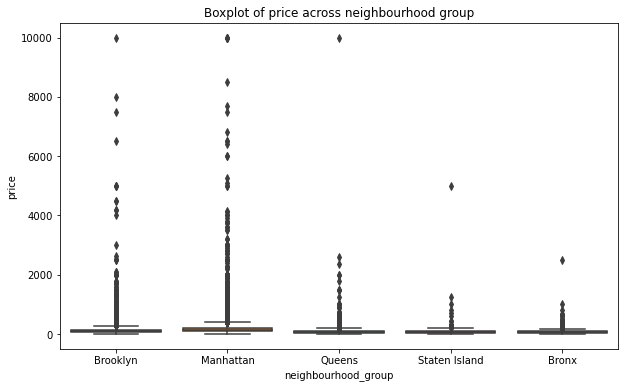

In [226]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='neighbourhood_group', y='price')
plt.title("Boxplot of price across neighbourhood group")
plt.show()

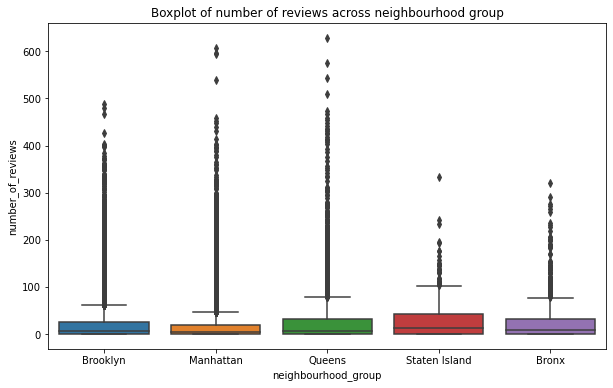

In [228]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='neighbourhood_group', y='number_of_reviews')
plt.title("Boxplot of number of reviews across neighbourhood group")
plt.show()

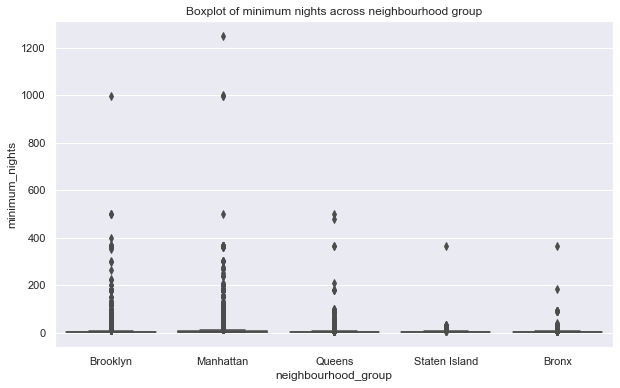

In [255]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='neighbourhood_group', y='minimum_nights')
plt.title("Boxplot of minimum nights across neighbourhood group")
plt.show()

In [227]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [245]:
sns.set_theme()

<AxesSubplot:>

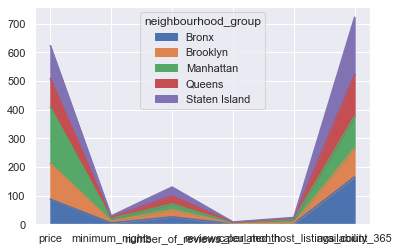

In [254]:
data.groupby('neighbourhood_group')[num_cols].mean().T.plot.area()

In [239]:
# Function to calculate average of a grouped column
def group_avg(data, col):
    grouped_avg = data.groupby(col).mean().iloc[:,4:]
    return grouped_avg

neighbourhood_group_avg = group_avg(data, 'neighbourhood_group')
neighbourhood_group_avg

price  minimum_nights  number_of_reviews  \
neighbourhood_group                                                  
Bronx                 87.496792        4.560953          26.004583   
Brooklyn             124.383207        6.056556          24.202845   
Manhattan            196.875814        8.579151          20.985596   
Queens                99.517649        5.181433          27.700318   
Staten Island        114.812332        4.831099          30.941019   

                     reviews_per_month  calculated_host_listings_count  \
neighbourhood_group                                                      
Bronx                         1.837831                        2.233731   
Brooklyn                      1.283212                        2.284371   
Manhattan                     1.272131                       12.791330   
Queens                        1.941200                        4.060184   
Staten Island                 1.872580                        2.319035   

                     availability_365  
neighbourhood_group                    
Bronx                      165.758937  
Brooklyn                   100.232292  
Manhattan                  111.979410  
Queens                     144.451818  
Staten Island              199.678284

In [240]:
room_type_avg = group_avg(data, 'room_type')
room_type_avg

price  minimum_nights  number_of_reviews  \
room_type                                                        
Entire home/apt  211.794246        8.506907          22.842418   
Private room      89.780973        5.377900          24.112962   
Shared room       70.127586        6.475000          16.600000   

                 reviews_per_month  calculated_host_listings_count  \
room_type                                                            
Entire home/apt           1.306578                       10.698335   
Private room              1.445209                        3.227717   
Shared room               1.471726                        4.662931   

                 availability_365  
room_type                          
Entire home/apt        111.920304  
Private room           111.203933  
Shared room            162.000862

In [243]:
data.groupby('neighbourhood_group').sum()

id        host_id      latitude     longitude  \
neighbourhood_group                                                            
Bronx                 24803796188   115220380205   44565.50071 -8.060805e+04   
Brooklyn             367035792483  1140203577483  817931.96821 -1.486715e+06   
Manhattan            406683958152  1469279004836  883012.01680 -1.602364e+06   
Queens               123263814259   544824426112  230784.85597 -4.185631e+05   
Staten Island          8055857451    36753031930   15147.61383 -2.764147e+04   

                       price  minimum_nights  number_of_reviews  \
neighbourhood_group                                               
Bronx                  95459            4976              28371   
Brooklyn             2500600          121761             486574   
Manhattan            4264527          185833             454569   
Queens                563867           29358             156950   
Staten Island          42825            1802              11541   

                     reviews_per_month  calculated_host_listings_count  \
neighbourhood_group                                                      
Bronx                          1609.94                            2437   
Brooklyn                      21104.98                           45925   
Manhattan                     21158.08                          277073   
Queens                         8879.05                           23005   
Staten Island                   587.99                             865   

                     availability_365  
neighbourhood_group                    
Bronx                          180843  
Brooklyn                      2015070  
Manhattan                     2425586  
Queens                         818464  
Staten Island                   74480

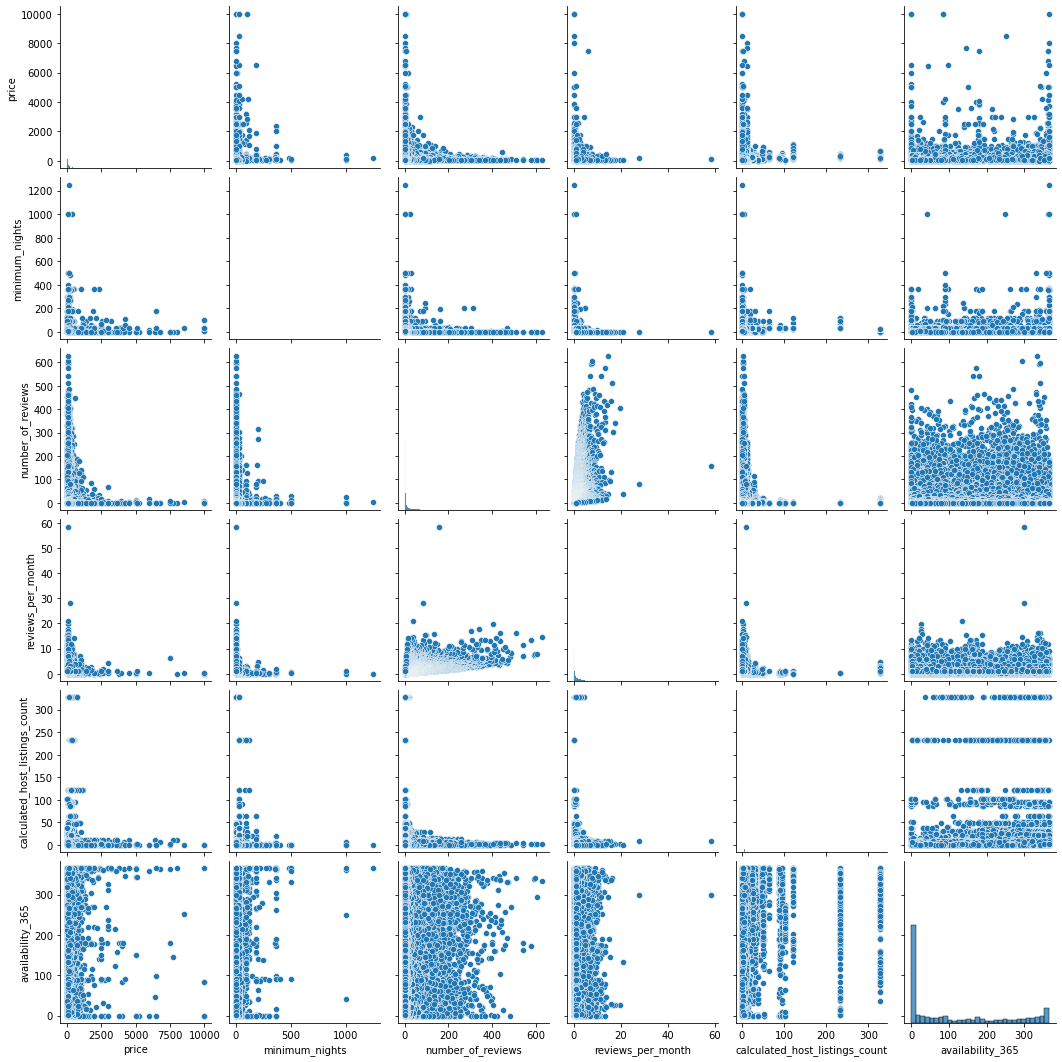

In [123]:
sns.pairplot(data.select_dtypes('number').iloc[:,4:])
plt.show()

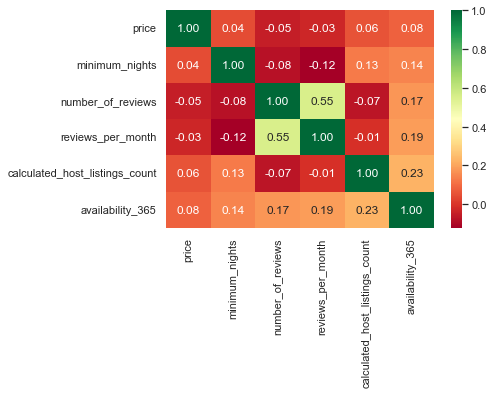

In [288]:
sns.heatmap(data.select_dtypes('number').iloc[:,4:].corr(), annot=True, fmt=".2f",
            cmap='RdYlGn')
plt.show()

In [107]:
def create_bar_plot(data, name='neighbourhood group', type_='average'):
    plt.figure(figsize=(16, 10))
    c = 1
    for col in data.columns:
        plt.subplot(2, 3, c)
        plt.title(f'{type_} {col} by {name}')
        bar = sns.barplot(data=data, 
                    x=data.index,
                   y=col)
        plt.bar_label(bar.containers[0], fmt="%.2f")
        c += 1
    plt.tight_layout()  
    plt.show()

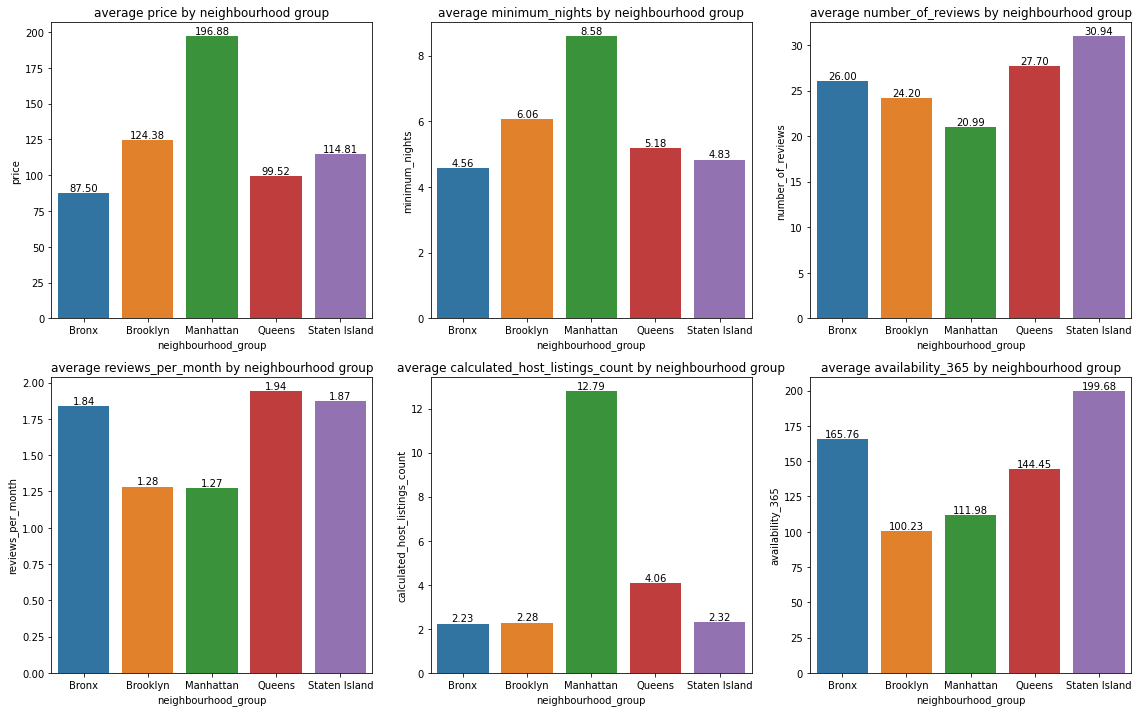

In [109]:
create_bar_plot(neighbourhood_group_avg, type_='average')

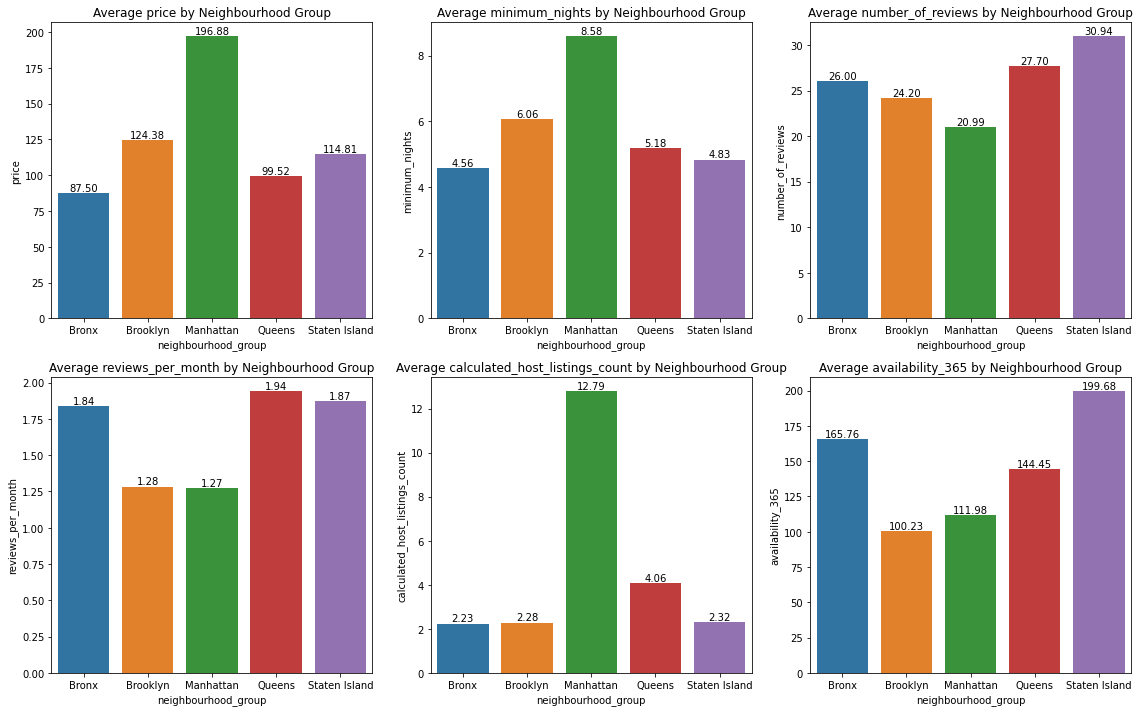

In [105]:
plt.figure(figsize=(16, 10))
c = 1
for col in neighbourhood_group_avg.columns:
    plt.subplot(2, 3, c)
    plt.title(f'Average {col} by Neighbourhood Group')
    bar = sns.barplot(data=neighbourhood_group_avg, 
                x=neighbourhood_group_avg.index,
               y=col)
    plt.bar_label(bar.containers[0], fmt="%.2F")
    c += 1
plt.tight_layout()  
plt.show()

In [35]:

room_type_max = group_max(data, 'room_type')

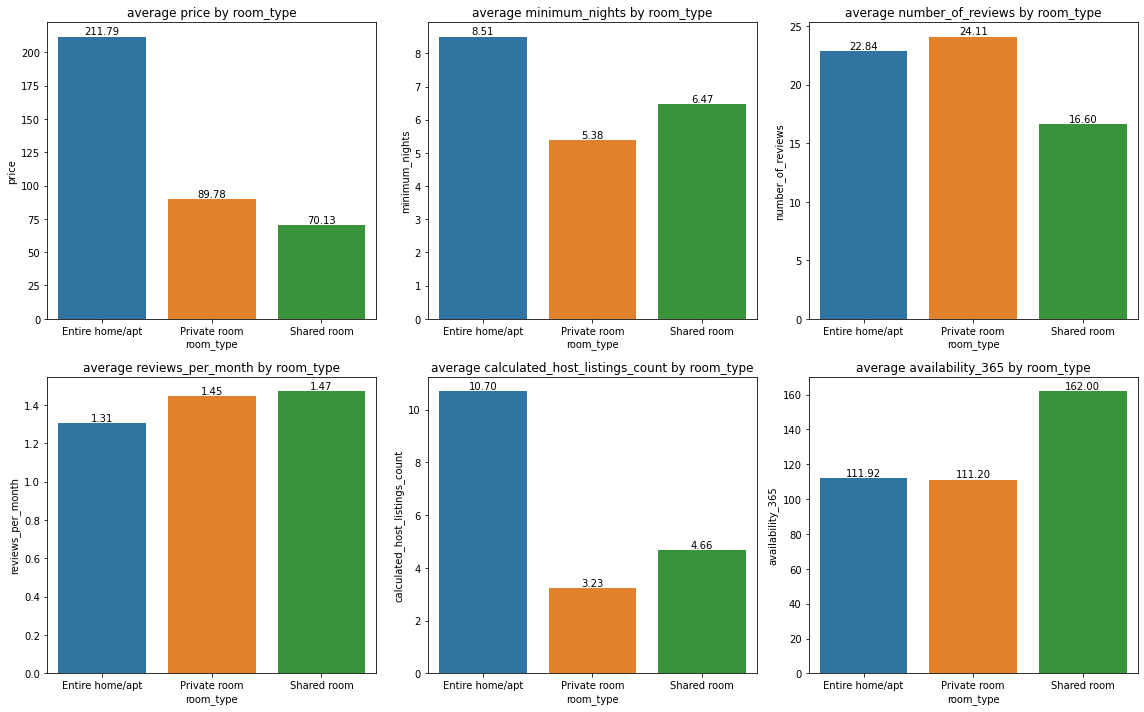

In [114]:
create_bar_plot(room_type_avg, 'room_type', type_='average')

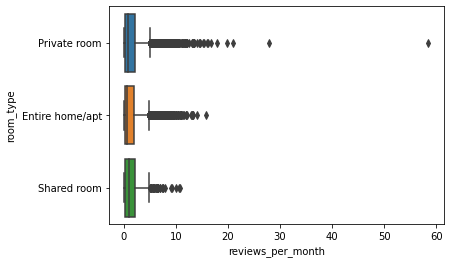

In [140]:
sns.boxplot(data=data, x='reviews_per_month', y='room_type')
plt.show()